In [ ]:
import tensorflow as tf

In [ ]:
#Conexión con google drive

from google.colab import drive
drive.mount('/content/drive')
#Rutas de paquetes de datos.

GPath =  '/content/drive/MyDrive/Kaggle/Digit Recognizer'
train_path = GPath + "/train.csv"
test_path = GPath + "/test.csv"

print(train_path)
print(test_path)

Mounted at /content/drive
/content/drive/MyDrive/Kaggle/Digit Recognizer/train.csv
/content/drive/MyDrive/Kaggle/Digit Recognizer/test.csv


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [ ]:
train_data = pd.read_csv(train_path)
test_data = pd.read_csv(test_path)

In [ ]:
train_data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#Definimos el shape
print("Train shape: "+ str(train_data.shape))
print("Test shape: "+ str(test_data.shape))

Train shape: (42000, 785)
Test shape: (28000, 784)


(42000, 784)
(42000,)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

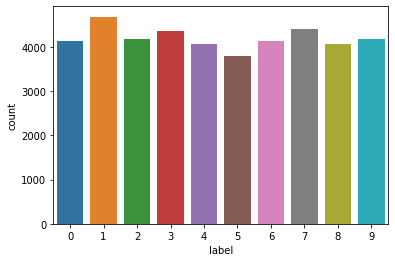

In [ ]:
#Extraemos las etiqquetas de cada imágen.
X_train=train_data.iloc[:,1:]
Y_train=train_data.iloc[:,0]

X_test=test_data.iloc[:,1:]
Y_test=test_data.iloc[:,0]

print(X_train.shape)
print(Y_train.shape)

#Mostramos los datos
g=sns.countplot(Y_train)
Y_train.value_counts()

#En este caso nos encontramos con un set de datos balanceado lo cual nos facilita el trabajo

## Normalización

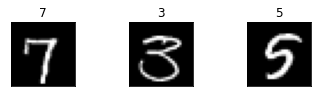

In [ ]:
#Convertimos los valores al rango de 0 a 1.
X_train=X_train/255.0
X_test=test_data/255.0

#Convertimos los datos al formato imágen
X_train=X_train.values.reshape(-1,28,28)

#Imprimimos algunas imágenes
for i in range(6, 9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[i],cmap='gray')
    plt.title(Y_train[i]);

In [ ]:
#Transformamos las imágenes en fotos y le añadimos 1 como canal, esto indica que trabajaremos con imágenes en blanco y negro

X_train=X_train.reshape(-1,28,28,1)

X_test=X_test.values.reshape(-1,28,28,1)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1)

## Creamos el modelo

In [ ]:
# Importing the required Keras modules containing model and layers
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout,Conv2D,MaxPooling2D, Flatten,PReLU,BatchNormalization,GlobalMaxPool2D

model = Sequential()

model.add(Conv2D(28, kernel_size=(3,3), input_shape=(28,28,1)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(Conv2D(28, kernel_size=(3,3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(BatchNormalization())

model.add(GlobalMaxPool2D())

model.add(Flatten())

model.add(Dense(1024))
model.add(Dropout(0.4))
model.add(PReLU())

model.add(Dense(1024))
model.add(Dropout(0.5))
model.add(PReLU())

model.add(Dense(1024))
model.add(Dropout(0.2))
model.add(PReLU())

model.add(Dense(10,activation=tf.nn.softmax))


In [ ]:
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                           patience = 10,
                                           mode = 'min')

model.fit(x=X_train,y=Y_train,batch_size = 1024, epochs=50,validation_data=(X_val,Y_val),callbacks = [callback])

Epoch 1/50
37/37 [==============================] - 3s 67ms/step - loss: 1.0422 - accuracy: 0.6669 - val_loss: 0.7460 - val_accuracy: 0.7693
Epoch 2/50
37/37 [==============================] - 2s 61ms/step - loss: 0.1950 - accuracy: 0.9403 - val_loss: 0.6464 - val_accuracy: 0.7974
Epoch 3/50
37/37 [==============================] - 2s 62ms/step - loss: 0.1251 - accuracy: 0.9607 - val_loss: 0.6979 - val_accuracy: 0.7607
Epoch 4/50
37/37 [==============================] - 2s 62ms/step - loss: 0.0997 - accuracy: 0.9685 - val_loss: 0.4207 - val_accuracy: 0.8614
Epoch 5/50
37/37 [==============================] - 2s 62ms/step - loss: 0.0837 - accuracy: 0.9742 - val_loss: 0.1557 - val_accuracy: 0.9540
Epoch 6/50
37/37 [==============================] - 2s 67ms/step - loss: 0.0732 - accuracy: 0.9757 - val_loss: 0.1185 - val_accuracy: 0.9640
Epoch 7/50
37/37 [==============================] - 2s 63ms/step - loss: 0.0643 - accuracy: 0.9798 - val_loss: 0.1289 - val_accuracy: 0.9607
Epoch 8/50
37

In [ ]:
print(X_train.shape)
print(X_train.shape)
print(X_test.shape)
print(Y_test.shape)
model.evaluate(X_test, Y_test)

(37800, 28, 28, 1)
(37800, 28, 28, 1)
(28000, 28, 28, 1)
(28000,)
875/875 [==============================] - 2s 3ms/step - loss: 23.2386 - accuracy: 0.0975


[23.238595962524414, 0.09753571450710297]

2


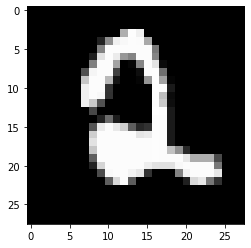

In [ ]:
pre = model.predict(X_test)
i = -13
print(np.argmax(pre[i], axis=-1))

plt.imshow(X_test[i].reshape(28,28,),cmap='gray')

In [ ]:
prediction = np.argmax(model.predict(X_test), axis=-1)

In [ ]:
submit = pd.DataFrame({"ImageId":range(1,len(prediction)+1), 'Label':prediction})
submit.to_csv("submission.csv",index = False)